In [138]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K

In [139]:
print(tf.__version__)
print(keras.__version__)

2.19.0
3.10.0


In [140]:
# Switch between Eager Execution mode and Computational Graph mode
# from tensorflow.python.eager.context import context, EAGER_MODE, GRAPH_MODE
# def switch_to(mode):
#     ctx = context()._eager_context
#     ctx.mode = mode
#     ctx.is_eager = mode == EAGER_MODE

In [141]:
# Once you enable or disable eager execution mode you can't do a thing to it in that session, you need to create a new session
# tf.compat.v1.disable_eager_execution()
# tf.config.run_functions_eagerly(True)
model = VGG16(weights='imagenet')

In [142]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!wget https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg

![image](./creative_commons_elephant.jpg)

In [144]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
<class 'numpy.ndarray'>


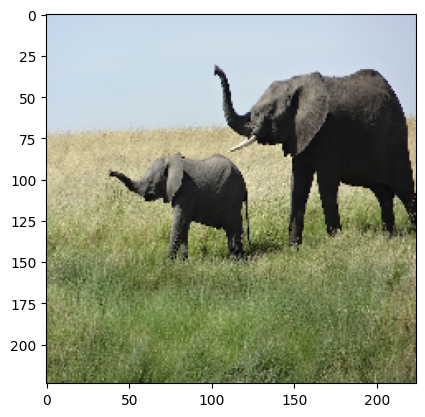

In [145]:
# Local path to our image
img_path = './creative_commons_elephant.jpg'
# img_path = '/Users/masoudkord/Documents/Projects/Practical_DL/01-05-Transfer-Learning/creative_commons_elephant.jpg'
# img_path = '/Users/masoudkord/Documents/Projects/Practical_DL/01-05-Transfer-Learning/Sanders.jpg'
# img_path = '/Users/masoudkord/Documents/Projects/Practical_DL/01-05-Transfer-Learning/david.jpg'

# Load and resize image
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

# Convert image to an array
x = image.img_to_array(img)
print(x.shape)

# Expand dimension to make a list of input
x = np.expand_dims(x, axis=0)
print(x.shape)

# Preprocess
x = preprocess_input(x)
print(x.shape)
print(type(x))

In [146]:
# switch_to(EAGER_MODE)
preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


In [147]:
# help(decode_predictions)

In [148]:
print('Predicted', decode_predictions(preds, top=3)[0])
print(decode_predictions)
print(len(decode_predictions(preds)))
print(type(decode_predictions(preds)))
print(decode_predictions(preds)[0])

Predicted [('n02504458', 'African_elephant', np.float32(0.90988576)), ('n01871265', 'tusker', np.float32(0.08572496)), ('n02504013', 'Indian_elephant', np.float32(0.0043471293))]
<function decode_predictions at 0x121145260>
1
<class 'list'>
[('n02504458', 'African_elephant', np.float32(0.90988576)), ('n01871265', 'tusker', np.float32(0.08572496)), ('n02504013', 'Indian_elephant', np.float32(0.0043471293)), ('n02408429', 'water_buffalo', np.float32(4.0511004e-05)), ('n02397096', 'warthog', np.float32(1.3894291e-06))]


In [149]:
activated_neurons = np.argmax(preds[0]) # how many neurons got activated in the last layer
activated_neurons = int(activated_neurons)
print(activated_neurons)
print(type(activated_neurons))

386
<class 'int'>


In [150]:
# !brew install graphviz
# keras.utils.plot_model(model)

In [151]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

# help(model_to_dot)
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [152]:
output = model.output[:, activated_neurons]
print(output)

last_conv_layer = model.get_layer('block5_conv3')

print(tf.executing_eagerly())
# Can't run tf.keras.backend in eager execution mode

<KerasTensor shape=(None,), dtype=float32, sparse=False, ragged=False, name=keras_tensor_170>
True


In [153]:
grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

# Use GradientTape to record operations
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    output = predictions[:, activated_neurons]  # Class index for "African elephant"

# Compute the gradient of the African elephant class with regard to the feature map
grads = tape.gradient(output, conv_outputs)

# Take the mean of the gradients over the spatial dimensions
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiply each channel by its importance
conv_outputs = conv_outputs[0].numpy()  # Remove batch dimension
pooled_grads = pooled_grads.numpy()

for i in range(pooled_grads.shape[-1]):
    conv_outputs[:, :, i] *= pooled_grads[i]

# Create the heatmap
heatmap = tf.reduce_mean(conv_outputs, axis=-1)

# Normalize between 0 and 1
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

/opt/anaconda3/envs/ai/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_147']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


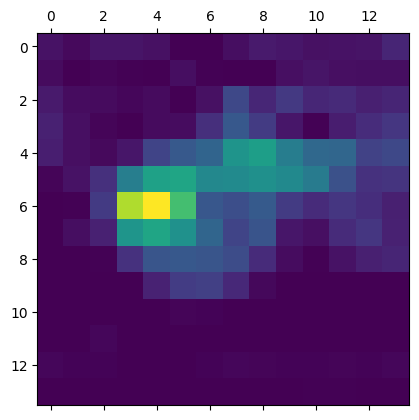

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [155]:
import cv2

# We use cv2 to load the original image
img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img

# Save the image to disk
cv2.imwrite('./heatmap_on_original.jpg', superimposed_img)

True

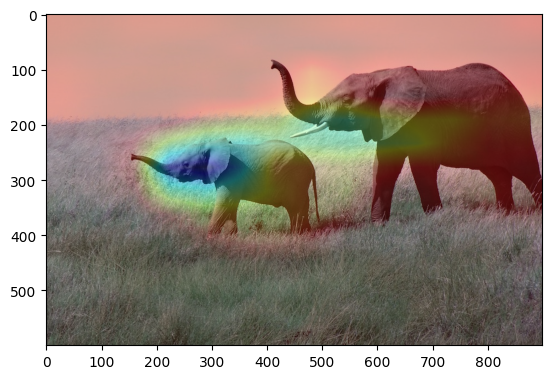

In [156]:
superimposed_img_norm = superimposed_img/max(superimposed_img.flatten())
plt.imshow(superimposed_img_norm)